<a href="https://colab.research.google.com/github/zyx20180209/test2023/blob/main/minst_dataset_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# load dataset
mnist = tf.keras.datasets.mnist

In [5]:
# split the dataset into train/test/validation sets
from sklearn.model_selection import train_test_split
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.mnist.load_data() 
x_train, x_validation, y_train, y_validation = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=44)

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
# Flatten the 2D image examples to 1D arrays with 784 features. Normalize the feature values to 
# range between 0.0 and 1.0. Convert the target values into one hot vectors for multi-class 
# classification. 
x_train = tf.keras.utils.normalize(x_train)
x_train = tf.reshape(x_train, [-1, 784])
y_train = tf.one_hot(y_train, depth=10, dtype=tf.float64) 

x_validation = tf.keras.utils.normalize(x_validation)
x_validation = tf.reshape(x_validation, [-1, 784])
y_validation = tf.one_hot(y_validation, depth=10, dtype=tf.float64) 

x_test = tf.keras.utils.normalize(x_test)
x_test = tf.reshape(x_test, [-1, 784])
y_test = tf.one_hot(y_test, depth=10, dtype=tf.float64) 

In [7]:
model = tf.keras.Sequential([ 
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Dense(128,      
                          activation='relu', 
                          kernel_initializer = tf.keras.initializers.Constant(0.01), # initialize the weights to be 0.01
                          bias_initializer=tf.keras.initializers.Zeros()),           # initialize the bias to be 0
    tf.keras.layers.Dense(10, 
                          kernel_initializer = tf.keras.initializers.Constant(0.01), # initialize the weights to be 0.01 
                          bias_initializer=tf.keras.initializers.Zeros())            # initialize the bias to be 0 
]) 

In [8]:
# predict from a single input
def predict_1(single_x, input_model):
  return tf.convert_to_tensor(input_model.predict(np.array([single_x,])))

# predict from a input set
def predict_a(x, input_model):
  return tf.convert_to_tensor(input_model.predict(x))

In [9]:
# training loop using sgd opitmizer
training_loss = [None] * 1000
validation_loss = [None] * 1000
tf.random.set_seed(11) 
for i in range(1000):
  optimizer = tf.optimizers.SGD(learning_rate=0.001)
  loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
  with tf.GradientTape() as tape:
    logits =  model(x_train, training=True)
    loss_value = loss_fn(y_train, logits)
  grads = tape.gradient(loss_value, model.trainable_weights)
  optimizer.apply_gradients(zip(grads, model.trainable_weights))
  training_loss[i] = loss_value
  val_logit = predict_a(x_validation, model)
  validation_loss[i] = loss_fn(y_validation, val_logit)
  if (i+1) % 100 == 0:
    print("Training loss at step %d: %.4f"% (i+1, float(loss_value)))

375/375 [==============================] - 1s 1ms/step
Training loss at step 100: 2.3012
375/375 [==============================] - 1s 2ms/step
Training loss at step 200: 2.3004
375/375 [==============================] - 0s 1ms/step
Training loss at step 300: 2.2999
375/375 [==============================] - 1s 1ms/step
Training loss at step 400: 2.2995
375/375 [==============================] - 1s 1ms/step
Training loss at step 500: 2.2993
375/375 [==============================] - 1s 1ms/step
Training loss at step 600: 2.2991
375/375 [==============================] - 1s 1ms/step
Training loss at step 700: 2.2990
375/375 [==============================] - 1s 1ms/step
Training loss at step 800: 2.2989
375/375 [==============================] - 1s 2ms/step
Training loss at step 900: 2.2988
375/375 [==============================] - 1s 1ms/step
Training loss at step 1000: 2.2986


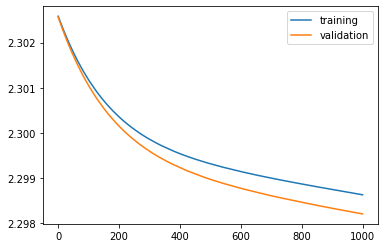

In [10]:
# plot the loss and visulize result
plt.plot(training_loss, label = "training")
plt.plot(validation_loss, label = "validation")
plt.legend(loc="upper right")

In [11]:
# reset model
model = tf.keras.Sequential([ 
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Dense(128,      
                          activation='relu', 
                          kernel_initializer = tf.keras.initializers.Constant(0.01), # initialize the weights to be 0.01
                          bias_initializer=tf.keras.initializers.Zeros()),           # initialize the bias to be 0
    tf.keras.layers.Dense(10, 
                          kernel_initializer = tf.keras.initializers.Constant(0.01), # initialize the weights to be 0.01 
                          bias_initializer=tf.keras.initializers.Zeros())            # initialize the bias to be 0 
]) 

In [12]:
# training loop using adam opitmizer
tf.random.set_seed(11) 
for i in range(1000):
  optimizer = tf.optimizers.Adam(learning_rate=0.001)
  loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
  with tf.GradientTape() as tape:
    logits =  model(x_train, training=True)
    loss_value = loss_fn(y_train, logits)
  grads = tape.gradient(loss_value, model.trainable_weights)
  optimizer.apply_gradients(zip(grads, model.trainable_weights))
  training_loss[i] = loss_value
  val_logit = predict_a(x_validation, model)
  validation_loss[i] = loss_fn(y_validation, val_logit)
  if (i+1) % 100 == 0:
    print("Training loss at step %d: %.4f"% (i+1, float(loss_value)))

375/375 [==============================] - 1s 1ms/step
Training loss at step 100: 2.0035
375/375 [==============================] - 1s 1ms/step
Training loss at step 200: 1.9568
375/375 [==============================] - 1s 1ms/step
Training loss at step 300: 1.7954
375/375 [==============================] - 1s 1ms/step
Training loss at step 400: 1.6391
375/375 [==============================] - 1s 1ms/step
Training loss at step 500: 1.5072
375/375 [==============================] - 1s 1ms/step
Training loss at step 600: 1.4444
375/375 [==============================] - 1s 1ms/step
Training loss at step 700: 1.4047
375/375 [==============================] - 1s 2ms/step
Training loss at step 800: 1.3726
375/375 [==============================] - 1s 1ms/step
Training loss at step 900: 1.3456
375/375 [==============================] - 1s 2ms/step
Training loss at step 1000: 1.3219


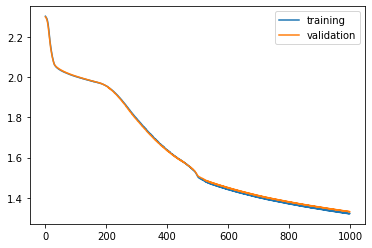

In [13]:
# plot result
plt.plot(training_loss, label = "training")
plt.plot(validation_loss, label = "validation")
plt.legend(loc="upper right")

In [14]:
# a new model with random initial weights
model_2 = tf.keras.Sequential([ 
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Dense(128,      
                          activation='relu', 
                          kernel_initializer=tf.keras.initializers.RandomNormal(
                              mean=0.0, stddev=0.1),
                          bias_initializer=tf.keras.initializers.Zeros()),           # initialize the bias to be 0
    tf.keras.layers.Dense(10, 
                          kernel_initializer=tf.keras.initializers.RandomNormal(
                              mean=0.0, stddev=0.1),
                          bias_initializer=tf.keras.initializers.Zeros())            # initialize the bias to be 0 
]) 

In [15]:
# train the model
training_loss = [None] * 1000
validation_loss = [None] * 1000
tf.random.set_seed(11) 
temploss = 0
for i in range(1000):
  optimizer = tf.optimizers.Adam(learning_rate=0.001)
  loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
  with tf.GradientTape() as tape:
    logits =  model(x_train, training=True)
    loss_value = loss_fn(y_train, logits)
  grads = tape.gradient(loss_value, model.trainable_weights)
  optimizer.apply_gradients(zip(grads, model.trainable_weights))
  training_loss[i] = loss_value
  val_logit = predict_a(x_validation, model)
  if loss_fn(y_validation, val_logit) == temploss:
    break
  temploss = loss_fn(y_validation, val_logit)
  validation_loss[i] = temploss
  if (i+1) % 100 == 0:
    print("Training loss at step %d: %.4f"% (i+1, float(loss_value)))

375/375 [==============================] - 1s 1ms/step
Training loss at step 100: 1.3005
375/375 [==============================] - 0s 1ms/step
Training loss at step 200: 1.2815
375/375 [==============================] - 0s 1ms/step
Training loss at step 300: 1.2650
375/375 [==============================] - 1s 1ms/step
Training loss at step 400: 1.2499
375/375 [==============================] - 1s 1ms/step
Training loss at step 500: 1.2357
375/375 [==============================] - 1s 1ms/step
Training loss at step 600: 1.2230
375/375 [==============================] - 1s 1ms/step
Training loss at step 700: 1.2113
375/375 [==============================] - 1s 2ms/step
Training loss at step 800: 1.2003
375/375 [==============================] - 1s 1ms/step
Training loss at step 900: 1.1899
375/375 [==============================] - 1s 1ms/step
Training loss at step 1000: 1.1804


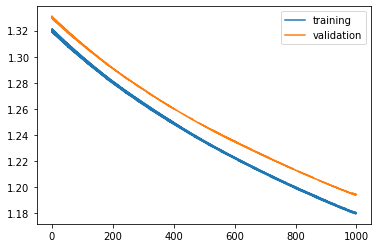

In [16]:
# plot
plt.plot(training_loss, label = "training")
plt.plot(validation_loss, label = "validation")
plt.legend(loc="upper right")

In [18]:
# compute accuracy of a predict model
from numpy.ma.core import argmax
count = 0
predict_model = tf.keras.Sequential([
    model_2, 
    tf.keras.layers.Softmax()
    ])
predictions = predict_model.predict(x_test)
predicted_labels = [None] * len(predictions)
y_test_labels = [None] * len(predictions)
for i in range(len(predictions)):
    predicted_result = np.argmax(predictions[i])
    actual_result = np.argmax(y_test[i])
    if (predicted_result == actual_result):
      count = count + 1

count / len(predictions)

313/313 [==============================] - 1s 1ms/step


0.1469